# Pruebas Aleatoriedad Taller 3

In [1]:
class GeneradoresAleatorios:
    
    def genera_Conguencial(self,cant,semilla):
       
        longitud=0
        x0=semilla
        xi=x0
        m=171
        a=13
        b=7
        v=[]
       
        while cant>0: 
            xi=float((a*xi+b)%m)
            ui=xi/m
            print xi," ",ui           
            v.append(ui)
            cant-=1
        return v
  

    def genera_randu(self,cant,semilla): 
       
        m=2147483648
        a=65539
        xi=semilla
        v =[]
        while cant>0: 
            xi=float((a*xi) % m)
            ui=xi/m
            print ui
            v.append(ui)            
            cant-=1
        return v    
        
    def genera_wichmannHill(self,cant,semilla): 
        x0=semilla
        y0=7*semilla
        z0=2*semilla
        mx=30269
        my=30307
        mz=30323
        ax=171
        ay=172
        az=170
        xi=x0
        yi=y0
        zi=z0
        v=[]
        while cant>0: 
            xi=float((ax*xi) % mx)
            yi=float((ay*yi) % my)
            zi=float((az*zi) % mz)
            ui=((xi/mx)+(yi/my)+(zi/mz)) % 1
            print ui
            v.append(ui)            
            cant-=1
        if len(v)==1:     
            return v[0]
        else:
            return v

g=GeneradoresAleatorios() 
          
#g.genera_Conguencial(100,25)
#g.genera_randu(100,25)
#g.genera_wichmannHill(100,25)


digite 1 para Test Chi Cuadrado
digite 2 para rachas
digite 3 para Smirnov
Con cual metodo quiere Realizar el Test? 1
__________________________
 Chi_Cuadrado: 
digite 1 para Generador Conguencial
digite 2 para Generador Randu
digite 3 para Generador wichmannHill
A cual metodo quiere realizar el Test? 1
__________________________
 Conguencial: 
161.0   0.941520467836
48.0   0.280701754386
118.0   0.690058479532
2.0   0.0116959064327
33.0   0.19298245614
94.0   0.549707602339
32.0   0.187134502924
81.0   0.473684210526
34.0   0.198830409357
107.0   0.625730994152
30.0   0.175438596491
55.0   0.321637426901
38.0   0.222222222222
159.0   0.929824561404
22.0   0.12865497076
122.0   0.713450292398
54.0   0.315789473684
25.0   0.146198830409
161.0   0.941520467836
48.0   0.280701754386
118.0   0.690058479532
2.0   0.0116959064327
33.0   0.19298245614
94.0   0.549707602339
32.0   0.187134502924
81.0   0.473684210526
34.0   0.198830409357
107.0   0.625730994152
30.0   0.175438596491
55.0   0.3

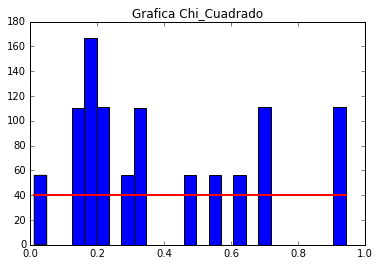

In [2]:
%matplotlib inline 
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
g=GeneradoresAleatorios()

class Contrastes:
    
    def chiCuadrado(self): 
        
        print "digite 1 para Generador Conguencial"
        print "digite 2 para Generador Randu"
        print "digite 3 para Generador wichmannHill"
        tipo = input("A cual metodo quiere realizar el Test? ")    

        if tipo == 1:
            print "__________________________"
            print " Conguencial: "
            n=1000 #Longitud de la secuencia
            k=25 # cantidad de subintervalos
            xau=g.genera_Conguencial(n,k)            
                 
        elif tipo == 2:
            print "__________________________"
            print " Randu: "
            n=1000 #Longitud de la secuencia
            k=25 # cantidad de subintervalos
            xau=g.genera_randu(n,k)
               
        elif tipo == 3:
            print "__________________________"
            print " WichmannHill"
            n=1000 #Longitud de la secuencia
            k=25 # cantidad de subintervalos
            xau=g.genera_wichmannHill(n,k)
            
        else: 
            print "__________________________"
            print " La opcion no esta en la lista "

        
        ei=n/k  #Cantidad esperada de observaciones
        chicuad=0.0 #Almacena la suma acumulada del test
        i=1.
        fo=[]#vector con las frecuencias observadas
        # siclo de comparaciones

        while i<=k:
            fi=self.contarMuestras(xau,(i-1)/k,i/k) # Deterina las obsevaciones en una clase 
            fo.append(fi)
            chicuad+=np.square(fi-ei)/ei # Variable que calcula el test
            i+=1
        chiprobe,pvalue= st.chisquare(fo,ei)     
        
        plt.title("Grafica Chi_Cuadrado")  
        plt.hist(xau,k)
        plt.plot(xau,ei*np.ones_like(xau),lw=2.0,color='r')
        
        print 'Hipotesis dada con 100 grados de libertad y alfa de 0.05'
        print 'Frecuencia Esperada:', chicuad    
        print 'frecuencia Observada:',chiprobe
        print 'Valor Chi:',pvalue
                
    def contarMuestras(self,a,vmin,vmax):
        cant=0
        for x in a:
             
            if vmin < x < vmax: # si la observación esta dentro de la clase se cueta una nueva observación
                cant+=1
       
        return cant
    
        
    def rachas(self):
        
        print "digite 1 para Generador Conguencial"
        print "digite 2 para Generador Randu"
        print "digite 3 para Generador wichmannHill"
        tipo = input("A cual metodo quiere realizar el Test? ")    

        if tipo == 1:
            print "__________________________"
            print " Conguencial: "
            n=1000 #Longitud de la secuencia
            k=25 # cantidad de subintervalos
            xau=g.genera_Conguencial(n,k)            
                 
        elif tipo == 2:
            print "__________________________"
            print " Randu: "
            n=1000 #Longitud de la secuencia
            k=25 # cantidad de subintervalos
            xau=g.genera_randu(n,k)
               
        elif tipo == 3:
            print "__________________________"
            print " WichmannHill"
            n=1000 #Longitud de la secuencia
            k=25 # cantidad de subintervalos
            xau=g.genera_wichmannHill(n,k)
            
        else: 
            print "__________________________"
            print " La opcion no esta en la lista "

            
        #n=100 #Longitud de la secuencia
        #x=g.genera_wichmannHill(n,30)  #Secuencia de numeros aleatorios      
        media,desv,test=0,0,0 #parametros para el calculo del test
        r,n,i=[],0,0       #Parametros para el calculo de las rachas
        while i< (len(xau)-1):           
            if xau[i+1] >= xau[i]:
                r.append(1)
            #   des+=1
            else:               
                r.append(0)               
            #   asc+=1
            i+=1
        i=0 #variable para las iteraciones del vector con las rachas  
        l=0 # Variable Auxiliar para el conteo de rachas
        #[000100011]               
        while i< len(r):#Determina el numero de cambios     que hay en el vector binario (unos y ceros) de rachas
            if i==0:
                l=r[i]
            else:
                if r[i]!=l:
                    n+=1
                if (i==(len(r)-1)):
                    n+=1
            l=r[i]
                
            i+=1
            
        media,desv=(2*n-1)/3.,(16*n-29)/90. #Parametros para la distribución gausiana
        
        plt.title("Grafica Rachas")  
        test=st.norm.pdf(xau,media,desv) # Se calcula el test con la distribución normalizada
        plt.hist(test,k)
        #plt.plot(np.sort(x),x,'o-')
        plt.grid(True)
        #plt.plot(xau,ei*np.ones_like(xau),lw=2.0,color='r')
        
        print 'Numero iteraciones:',n
        print 'Valor Medio:',media
        print 'Valor Desviacion:',desv
        
            
    def smirnov(self):
       
        print "digite 1 para Generador Conguencial"
        print "digite 2 para Generador Randu"
        print "digite 3 para Generador wichmannHill"
        tipo = input("A cual metodo quiere realizar el Test? ")    

        if tipo == 1:
            print "__________________________"
            print " Conguencial: "
            n=1000 #Longitud de la secuencia
            k=25 # cantidad de subintervalos
            xau=g.genera_Conguencial(n,k)            
                 
        elif tipo == 2:
            print "__________________________"
            print " Randu: "
            n=1000 #Longitud de la secuencia
            k=25 # cantidad de subintervalos
            xau=g.genera_randu(n,k)
               
        elif tipo == 3:
            print "__________________________"
            print " WichmannHill"
            n=1000 #Longitud de la secuencia
            k=25 # cantidad de subintervalos
            xau=g.genera_wichmannHill(n,k)
            
        else: 
            print "__________________________"
            print " La opcion no esta en la lista "
    
        #N = 100
        # Teoretical CDF for Uniform distribution F(x)
        u = [1.0] * n
        #print(u)

        # Gerate random numbers with Uniform distribution f(x)
        #np.random.seed(123456789)
        
        #x = np.random.uniform(0,1,N)
        #x=g.genera_wichmannHill(100,23)

        # Plot empirical distribution f(x)
        count, bins, ignored = plt.hist(xau, 25, normed=True)
        plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        plt.show()
        
               
        x1 = np.arange(1/float(n),1+1/float(n),1/float(n))
        y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

        x2 = np.sort(xau)
        y2 = np.cumsum(np.sort(xau)/np.max(np.cumsum(xau)))

        De=np.absolute(y2-y1)
        #print(D)
        
        print("De = ",np.max(De))

        # Plotting
        plt.plot(x1,y1,label='Uniform')
        plt.step(x2,y2,label='Random')
        x3 = [x1[De.argmax()],x1[De.argmax()]]
        y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
        plt.step(x3,y3,label='D')

        #plt.plot(x1,De,label='De')

        plt.legend()
        plt.xlabel('X')
        plt.ylabel('Cumulative Probability P(X)')
        #plt.title('arbitrary')
        #plt.xscale('log')
        #plt.yscale('log')

        #plt.xlim(0, np.max([np.max(whitney),np.max(redwell)])+0.05)
        plt.ylim(0, 1.05)

        plt.show()

        # scipy function for K-S test
        from scipy import stats
        D,pvalue = stats.kstest(y2, 'uniform')
        print("D = ", D)
        print("p-value = ", pvalue)
        
a=Contrastes() 
    
print "digite 1 para Test Chi Cuadrado"
print "digite 2 para rachas"
print "digite 3 para Smirnov"

tipo = input("Con cual metodo quiere Realizar el Test? ")    

if tipo == 1:
    print "__________________________"
    print " Chi_Cuadrado: "
    a.chiCuadrado()    
elif tipo == 2:
    print "__________________________"
    print " Rachas: "
    a.rachas()   
elif tipo == 3:
    print "__________________________"
    print " Smirnov"
    a.smirnov()
else: 
    print "__________________________"
    print " La opcion no esta en la lista "

